In [414]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [415]:
!pip install pmdarima

In [416]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=ALICL&resolution=1D&rangeStartDate=1642411546&rangeEndDate=1770545453&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("ASIAN.json", "w") as f:
    json.dump(data, f)

In [417]:
companies = ["/content/ASIAN.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642452300, 1642538700, 1642625100, 1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 165359790

In [418]:
df = pd.read_csv("ASIAN.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

942


In [419]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-17,575.00,571.75,579.05,564.02,48327.0
2022-01-18,575.00,572.57,579.05,567.28,60928.0
2022-01-19,583.41,567.69,583.41,562.00,29278.0
2022-01-20,568.91,573.37,577.03,559.60,37239.0
2022-01-23,581.09,572.96,586.78,572.68,72785.0


In [420]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-02-02,481.9,479.0,482.0,475.0,34706.0
2026-02-03,475.0,477.0,482.7,474.3,26671.0
2026-02-04,467.5,474.1,480.5,467.5,25539.0
2026-02-05,483.0,480.0,483.0,475.0,35987.0
2026-02-08,486.0,479.9,489.0,477.3,49511.0


In [421]:
type(df)

pandas.core.frame.DataFrame

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2022-01-17 to 2026-02-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    942 non-null    float64
 1   Close   942 non-null    float64
 2   High    942 non-null    float64
 3   Low     942 non-null    float64
 4   Volume  942 non-null    float64
dtypes: float64(5)
memory usage: 44.2 KB


<Axes: xlabel='Date'>

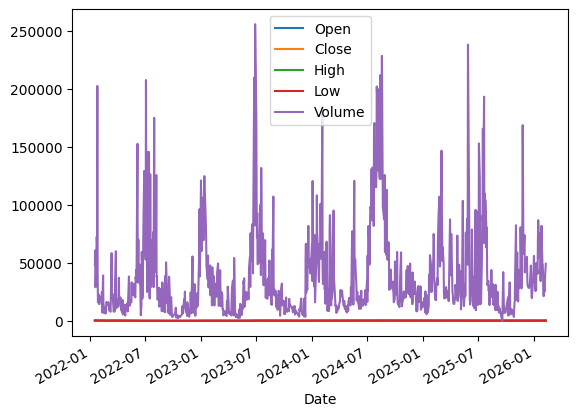

In [423]:
df.plot()

In [424]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"ASIAN {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [425]:
type(df['Close'])

pandas.core.series.Series

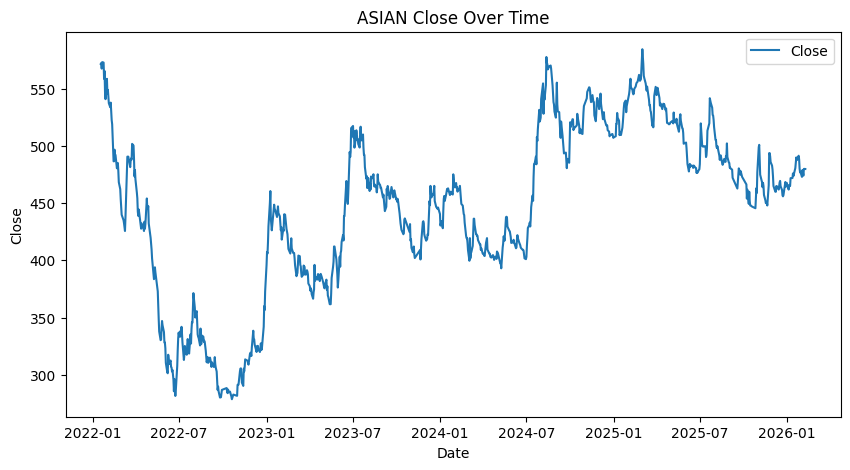

In [426]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")

##DICKEY FULLER TEST

In [427]:
from statsmodels.tsa.stattools import adfuller

In [428]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [429]:
adf_test(df['Close'])

ADF Statistic: -2.175380002861488
p-value: 0.21530211497133717
The series is not stationary.


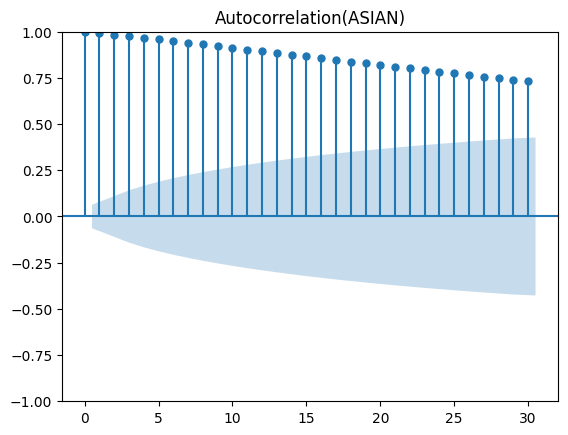

In [430]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])
plt.title("Autocorrelation(ASIAN)")
plt.show()

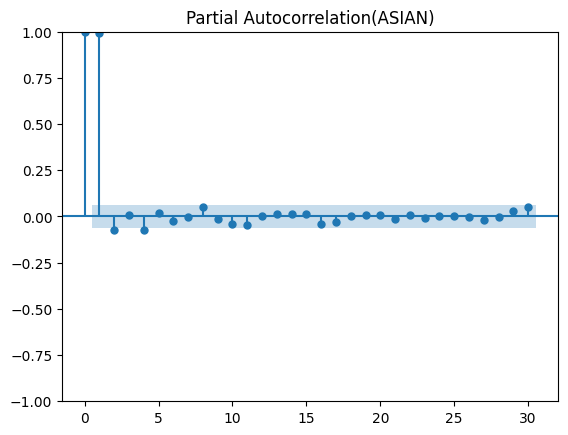

In [431]:
pacf = plot_pacf(df['Close'])
plt.title("Partial Autocorrelation(ASIAN)")
plt.show()

In [432]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [433]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-17,575.00,571.75,579.05,564.02,48327.0,NaN
2022-01-18,575.00,572.57,579.05,567.28,60928.0,0.82
2022-01-19,583.41,567.69,583.41,562.00,29278.0,-4.88
2022-01-20,568.91,573.37,577.03,559.60,37239.0,5.68
2022-01-23,581.09,572.96,586.78,572.68,72785.0,-0.41


In [434]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -28.07286615220922
p-value: 0.0
The series is stationary.


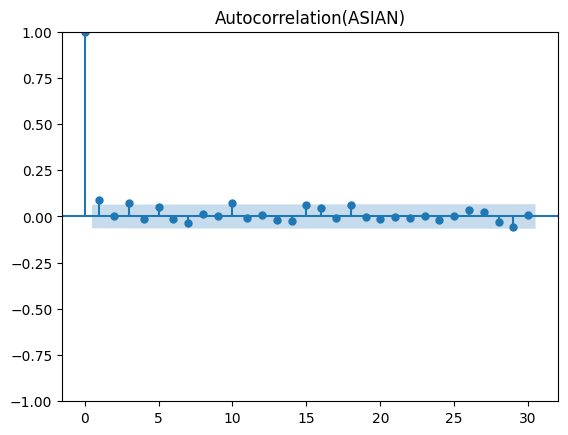

In [435]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)
plt.title("Autocorrelation(ASIAN)")
plt.show()

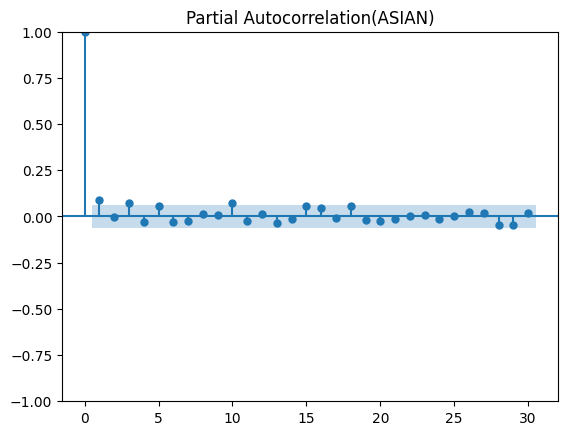

In [436]:
result = plot_pacf(data)
plt.title("Partial Autocorrelation(ASIAN)")
plt.show()

<Axes: xlabel='Date'>

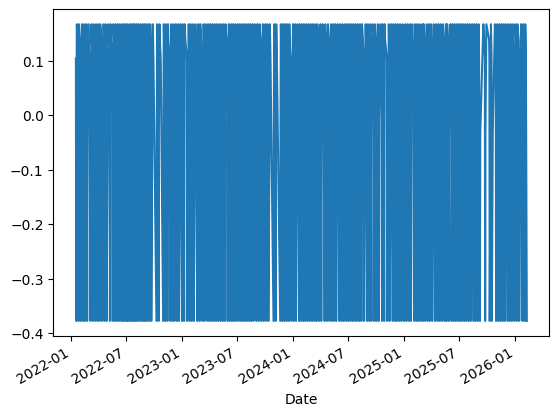

In [437]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(df['Close'],period=5)
decompose_result.seasonal.plot()

In [438]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
close=df['Close']
res = ARIMA(close, order=(0,1,0)).fit()
acorr_ljungbox(res.resid, lags=[10,15,20], return_df=True)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,lb_stat,lb_pvalue
10,2.655545,0.988410
15,2.988329,0.999607
20,4.672104,0.999837


In [439]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])

In [440]:
testing_data

[535.41,
 537.38,
 536.31,
 532.29,
 536.98,
 536.05,
 536.51,
 531.28,
 532.85,
 527.24,
 520.18,
 520.27,
 519.0,
 519.11,
 519.54,
 520.57,
 521.85,
 520.64,
 519.77,
 529.28,
 521.69,
 520.5,
 523.78,
 518.87,
 517.16,
 512.46,
 512.46,
 517.08,
 525.04,
 527.77,
 522.2,
 515.54,
 515.26,
 511.44,
 502.0,
 503.02,
 498.11,
 491.11,
 484.25,
 477.75,
 481.6,
 484.35,
 481.9,
 483.21,
 482.63,
 482.61,
 480.86,
 482.94,
 482.51,
 480.85,
 480.72,
 476.5,
 477.5,
 476.63,
 479.17,
 479.6,
 484.17,
 499.68,
 519.77,
 500.12,
 499.75,
 499.41,
 499.64,
 499.71,
 499.79,
 490.38,
 491.92,
 498.36,
 513.4,
 518.3,
 519.91,
 541.77,
 539.9,
 537.8,
 533.48,
 527.14,
 526.63,
 522.87,
 516.58,
 505.3,
 505.23,
 499.67,
 498.2,
 499.91,
 491.68,
 487.88,
 490.98,
 491.78,
 485.11,
 483.55,
 484.93,
 486.0,
 488.57,
 486.1,
 491.27,
 491.03,
 502.28,
 490.37,
 485.65,
 485.24,
 480.95,
 481.05,
 480.24,
 479.37,
 472.22,
 462.8,
 480.46,
 478.0,
 475.0,
 478.0,
 473.0,
 466.4,
 454.0,
 461.8,

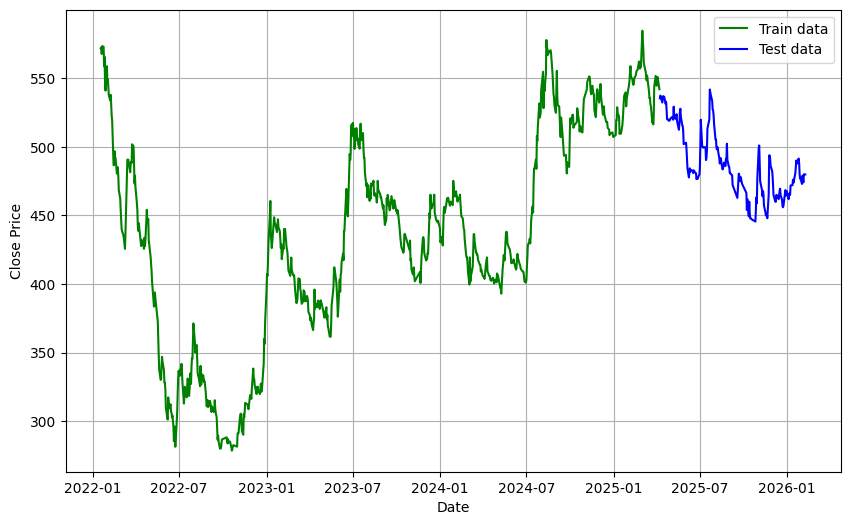

In [441]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [442]:
model_predictions=[]
n_test_obser = len(testing_data)

In [443]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(0,1,1))
    model_fit = model.fit()

    output = model_fit.forecast(steps=1)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])

In [444]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  941
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3266.278
Date:                Tue, 10 Feb 2026   AIC                           6536.555
Time:                        07:45:43   BIC                           6546.247
Sample:                             0   HQIC                          6540.250
                                - 941                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0886      0.027      3.229      0.001       0.035       0.142
sigma2        61.0468      1.955     31.230      0.000      57.216      64.878
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [445]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)

<class 'list'>
(189,)
[np.float64(541.2362779551723), np.float64(534.927222221158), np.float64(537.5828868121373), np.float64(536.2047697526543), np.float64(531.9658388200056), np.float64(537.3930983068759), np.float64(535.939579947695), np.float64(536.5569085790378), np.float64(530.8464507113619), np.float64(533.014068084785), np.float64(526.7686431591428), np.float64(519.6370695385233), np.float64(520.3221039153407), np.float64(518.891122107007), np.float64(519.128023394921), np.float64(519.5739265651425), np.float64(520.6520353869664), np.float64(521.9486902943643), np.float64(520.5322283519796), np.float64(519.707213800271), np.float64(530.067318460271), np.float64(521.0163594717296), np.float64(520.4584196963684), np.float64(524.0479900400808), np.float64(518.4541664051609), np.float64(517.0559184392552), np.float64(512.0897843807252), np.float64(512.4897970080706), np.float64(517.4499194791566), np.float64(525.6568437783998), np.float64(527.9422910127722), np.float64(521.73237895

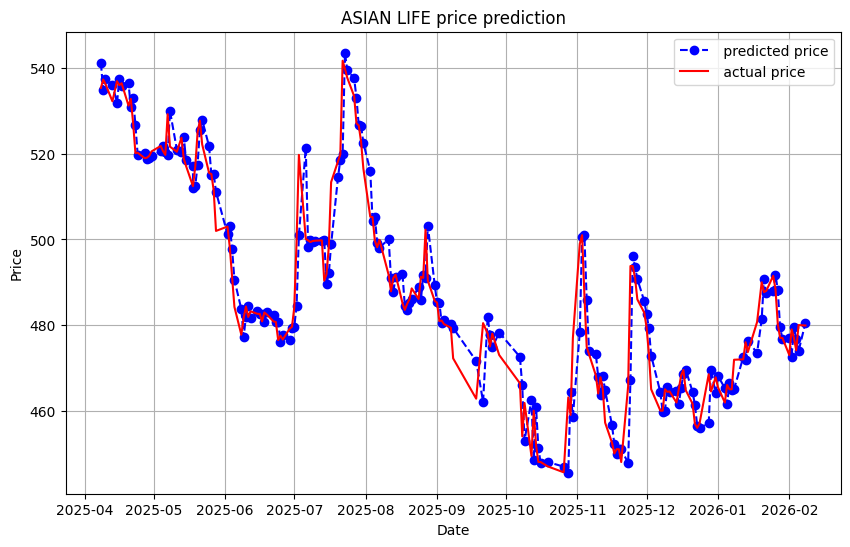

In [446]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label=' predicted price')
plt.plot(date_range, testing_data,color='red',label=' actual price')

plt.title('ASIAN LIFE price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [447]:

mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.00934930489234673


In [448]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE from arima for ASIAN:", rmse)
mae = mean_absolute_error(testing_data,model_predictions)
print("MAE from arima for ASIAN:", mae)

RMSE from arima for ASIAN: 6.6109915186464825
MAE from arima for ASIAN: 4.563375729607453


In [449]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(0,1,1))
final_model_fit = final_model.fit()

# --- Forecast next 5 days with confidence intervals ---
forecast = final_model_fit.get_forecast(steps=1)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



# --- Create future dates starting after last date in df ---
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# --- Interactive plot with plotly ---
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # light pink
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()

# --- Print next day prediction safely ---
print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 479.8430785008863


In [450]:
print(forecast)

In [451]:
# import pandas as pd
# import pmdarima as pm
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # Suppose df['Close'] has your stock prices
# # Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# # --- Step 1: Use auto_arima to find best p,d,q ---
# auto_model = pm.auto_arima(
#     df['Close'],
#     start_p=0, max_p=30,
#     start_q=0, max_q=30,
#     d=None,               # if None, automatically test for differencing
#     seasonal=False,       # change to True if you suspect seasonality
#     stepwise=True,        # faster search
#     suppress_warnings=True,
#     trace=True            # prints search progress
# )

# print("Best ARIMA order:", auto_model.order)

In [452]:
import pickle
with open("arima_model_feb_ASIAN.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")

Model saved as arima_model.pkl
